<h1 style="
  font-size: 30px; 
  text-align: center; 
  font-family: 'Poppins', sans-serif; 
  text-shadow: 2px 2px 5px rgba(63, 155, 77, 0.84);
  letter-spacing: 2px;
">
  <b>📊 Polynomial Regression</b>
</h1>
<hr style="width: 100%; border: 2px solid #21996fd1; border-radius: 5px;">


<h3 style="
  font-size: 20px; 
  font-family: 'Poppins', sans-serif; 
  text-shadow: 1px 1px 3px rgba(63, 155, 77, 0.84);
">
  <b>=> Data Creation For Practice</b>
</h3>


In [ ]:
import pandas as pd
data = {
    'Hours_Studied': [
        1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30
    ],
    'Sleep_Hours': [
        8,7.8,7.6,7.4,7.2,7,6.8,6.6,6.4,6.2,6,5.8,5.6,5.4,5.2,5,4.8,4.6,4.4,4.2,4,3.8,3.6,3.4,3.2,3,2.8,2.6,2.4,2.2
    ],
    'Assignments_Completed': [
        1,1,2,2,3,3,4,4,5,5,6,6,7,7,8,8,9,9,10,10,11,11,12,12,13,13,14,14,15,15
    ],
    'Exam_Score': [
        50,55,58,61,64,68,72,75,77,79,82,84,86,87,89,90,91,92,93,94,94.5,95,95.3,95.6,96,96.2,96.5,96.7,97,97.2
    ]
}


df = pd.DataFrame(data)
print(f"The Shape Of Data Is: {df.shape}", end="\n\n")
print(df)



The Shape Of Data Is: (30, 4)

    Hours_Studied  Sleep_Hours  Assignments_Completed  Exam_Score
0               1          8.0                      1        50.0
1               2          7.8                      1        55.0
2               3          7.6                      2        58.0
3               4          7.4                      2        61.0
4               5          7.2                      3        64.0
5               6          7.0                      3        68.0
6               7          6.8                      4        72.0
7               8          6.6                      4        75.0
8               9          6.4                      5        77.0
9              10          6.2                      5        79.0
10             11          6.0                      6        82.0
11             12          5.8                      6        84.0
12             13          5.6                      7        86.0
13             14          5.4               

<h3 style="
  font-size: 20px; 
  font-family: 'Poppins', sans-serif; 
  text-shadow: 1px 1px 3px rgba(63, 155, 77, 0.84);
">
  <b>=> Exploring Feature Relationships</b>
</h3>

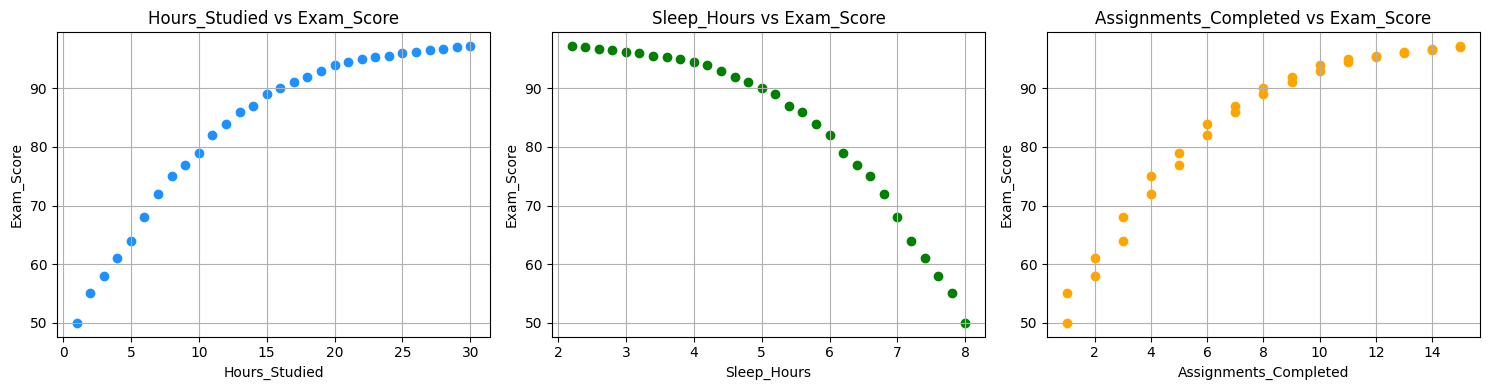

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# 🎨 Create visualizations to show the relationship between each feature and the target (Exam_Score)
plt.figure(figsize=(15, 4))  # Set the figure size (width=15, height=4)

# ============================
# Plot 1: Hours_Studied vs Exam_Score
# ============================
plt.subplot(1, 3, 1)  # Create the first subplot in a 1-row, 3-column layout
plt.scatter(df['Hours_Studied'], df['Exam_Score'], color='dodgerblue')  
plt.title('Hours_Studied vs Exam_Score')  
plt.xlabel('Hours_Studied')  
plt.ylabel('Exam_Score')    
plt.grid(True)              

# ============================
# Plot 2: Sleep_Hours vs Exam_Score
# ============================
plt.subplot(1, 3, 2)  
plt.scatter(df['Sleep_Hours'], df['Exam_Score'], color='green')  
plt.title('Sleep_Hours vs Exam_Score')
plt.xlabel('Sleep_Hours')
plt.ylabel('Exam_Score')
plt.grid(True)

# ============================
# Plot 3: Assignments_Completed vs Exam_Score
# ============================
plt.subplot(1, 3, 3)  
plt.scatter(df['Assignments_Completed'], df['Exam_Score'], color='orange')  
plt.title('Assignments_Completed vs Exam_Score')
plt.xlabel('Assignments_Completed')
plt.ylabel('Exam_Score')
plt.grid(True)

plt.tight_layout()
plt.show()


<h3 style="
  font-size: 20px; 
  font-family: 'Poppins', sans-serif; 
  text-shadow: 1px 1px 3px rgba(63, 155, 77, 0.84);
">
  <b>=> Building the Model</b>
</h3>

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# 1️⃣ Separate features (X) and target (y)
X = df[['Hours_Studied', 'Sleep_Hours', 'Assignments_Completed']]
y = df[['Exam_Score']]

# 2️⃣ Split the data into training and testing sets
# 80% of the data will be used for training, 20% for testing
# random_state=42 ensures the same split every time (for reproducibility)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3️⃣ Apply Polynomial Feature Transformation
# This step generates additional features such as squared terms and feature interactions
# Example: if X = [x1, x2], new features will include x1^2, x2^2, x1*x2, etc.
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# 4️⃣ Train the Linear Regression model on the transformed training data
# The model will learn the relationship between the polynomial features and the target variable
model = LinearRegression()
model.fit(X_train_poly, y_train)

# 5️⃣ Make predictions using the trained model on the transformed test data
y_pred_poly = model.predict(X_test_poly)

# 6️⃣ Evaluate the model performance
# R² Score measures how well the model fits the data (1 = perfect fit)
# MSE (Mean Squared Error) measures the average squared difference between predicted and actual values (lower is better)
print("R² Score:", r2_score(y_test, y_pred_poly))
print("MSE:", mean_squared_error(y_test, y_pred_poly))

# 7️⃣ Display actual vs predicted values in a comparison table
# This helps visualize how close the predictions are to the real scores
results = pd.DataFrame({'Actual': y_test['Exam_Score'], 'Predicted': y_pred_poly.flatten()})
print(results)


#------------------------------------------------------------------------------------
# polynomial features of degree 3
# poly2 = PolynomialFeatures(degree = 3)
# X_train_poly2 = poly2.fit_transform(X_train)
# X_test_poly2 = poly2.transform(X_test)
# model2 = LinearRegression()
# model2.fit(X_train_poly2, y_train)
# y_pred_poly2 = model2.predict(X_test_poly2)
# print("R² Score for degree 3:", r2_score(y_test, y_pred_poly2))

R² Score for degree 3: 0.9988872139189806
MSE: 0.06575978435059322


In [35]:
print(X_test_poly)
# print(X_train_poly2)

[[  1.    28.     2.6   14.   784.    72.8  392.     6.76  36.4  196.  ]
 [  1.    16.     5.     8.   256.    80.   128.    25.    40.    64.  ]
 [  1.    24.     3.4   12.   576.    81.6  288.    11.56  40.8  144.  ]
 [  1.    18.     4.6    9.   324.    82.8  162.    21.16  41.4   81.  ]
 [  1.     9.     6.4    5.    81.    57.6   45.    40.96  32.    25.  ]
 [  1.    10.     6.2    5.   100.    62.    50.    38.44  31.    25.  ]]


<h3 style="
  font-size: 20px; 
  font-family: 'Poppins', sans-serif; 
  text-shadow: 1px 1px 3px rgba(63, 155, 77, 0.84);
">
  <b>=> Linear Regression (Degree = 1)</b>
</h3>

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import pandas as pd


X = df[['Hours_Studied', 'Sleep_Hours', 'Assignments_Completed']]
y = df[['Exam_Score']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred_linear = model.predict(X_test)
print("R² Score:", r2_score(y_test, y_pred_linear))
print("MSE:", mean_squared_error(y_test, y_pred_linear), end="\n")
print('_' * 30, end="\n\n")
results = pd.DataFrame({
    'Actual': y_test['Exam_Score'],
    'Predicted': y_pred_linear.flatten().round(2)
})
print(results)


R² Score: 0.6124901660811444
MSE: 22.899785993814245
______________________________

    Actual  Predicted
27    96.7     102.58
15    90.0      83.75
23    95.6      96.30
17    92.0      86.89
8     77.0      73.08
9     79.0      74.34


<h3 style="
  font-size: 20px; 
  font-family: 'Poppins', sans-serif; 
  text-shadow: 1px 1px 3px rgba(63, 155, 77, 0.84);
">
  <b>=> 🎨 Plot:  Actual vs. Predicted (Linear & Polynomial)</b>
</h3>


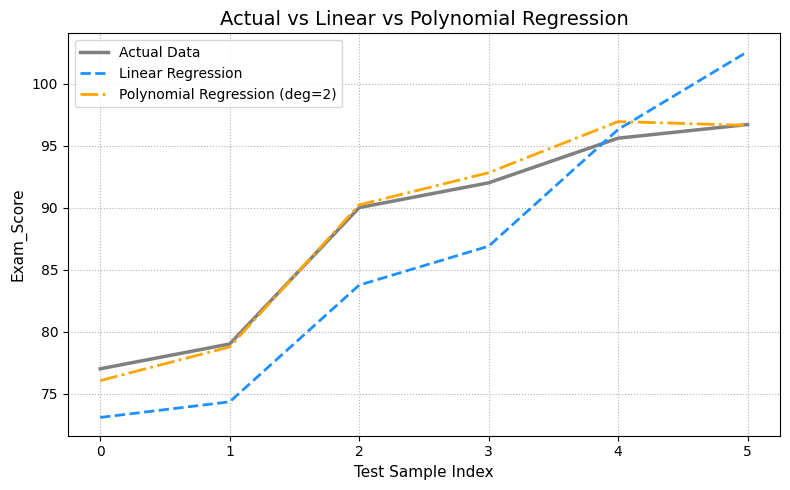

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 🎨 Visualization: Compare Actual, Linear, and Polynomial Predictions

plt.figure(figsize=(8, 5))

# Sort test data indices by y_test data (to keep the lines smooth and in order)
sorted_idx = np.argsort(y_test.index)

# Plot Actual Exam Scores
plt.plot(
    y_test.values[sorted_idx],
    color='gray',
    linewidth=2.5,
    label='Actual Data'
)

# Plot Linear Regression Predictions
plt.plot(
    y_pred_linear[sorted_idx],
    color='dodgerblue',
    linewidth=2,
    linestyle='--',
    label='Linear Regression'
)

# Plot Polynomial Regression Predictions
plt.plot(
    y_pred_poly[sorted_idx],
    color='orange',
    linewidth=2,
    linestyle='-.',
    label='Polynomial Regression (deg=2)'
)

# 🎯 Labels and formatting
plt.title('Actual vs Linear vs Polynomial Regression', fontsize=14)
plt.xlabel('Test Sample Index', fontsize=11)
plt.ylabel('Exam_Score', fontsize=11)
plt.legend(fontsize=10)
plt.grid(True, linestyle=':')
plt.tight_layout()
plt.show()
